# CMPT 898 
**__Neural Collaborative Filtering for Expert Recommendation__**


**Dataset Plan**


* Seyedeh Mina Mousavifar
* 11279515
* sem311

# Dataset Collection

## Gathering Data from Server

These are SQL queries that provide us the required datasets.

In [ ]:
# select activities of the best users
select * from Posts where OwnerUserId in (
    select Id from Users where Reputation > 320000)

# select questions that those users answered
select * from Posts where Id in (
    select ParentId from Posts where OwnerUserId in (
        select Id from Users where (
            Reputation > 575000 and Reputation < 595000)))

# select badges of the best users
select count(*) from Badges where UserId in (
    select Id from Users where Reputation > 320000)

## Loading Data

In [ ]:
import pandas as pd
import glob

# load questions
path = "data/Questions"
all_questions = glob.glob(path + "/*.csv")

question_list = []

for question in all_questions:
    q = pd.read_csv(question, index_col=None, low_memory=False)
    question_list.append(q)

questions = pd.concat(question_list, axis=0, ignore_index=True)

In [ ]:
# load answers
path = "data/Posts"
all_answers = glob.glob(path + "/*.csv")

answer_list = []

for answer in all_answers:
    a = pd.read_csv(answer, index_col=None, low_memory=False)
    answer_list.append(a)

answers = pd.concat(answer_list, axis=0, ignore_index=True)

Answers are the activities of our selected users. This data is a mixture of answers and questions that belong to these selected users. In order to sepreate questions and answers, we have to find the items that have $PostTypeId = 1$ and concat them to the questions dataset. 

In [ ]:
questions_post = answers[answers['PostTypeId'] == 1]
answers = answers[answers['PostTypeId'] != 1]

questions = pd.concat([questions, questions_post], axis=0, ignore_index=True)

In [ ]:
questions.to_csv("data/Questions.csv")
answers.to_csv("data/Answers.csv")

In [ ]:
# load badges
path = "data/Badges"
all_badges = glob.glob(path + "/*.csv")

badge_list = []

for badge in all_badges:
    a = pd.read_csv(badge, index_col=None, low_memory=False)
    badge_list.append(a)

badges = pd.concat(badge_list, axis=0, ignore_index=True)

In [ ]:
badges.to_csv("data/Badges.csv")

# Exploration

The following document includes exploration on *Questions*, *Answers*, *Users*, and *Badges*.

In [154]:
import pandas as pd

## Questions Exploration

In [155]:
questions = pd.read_csv('data/Questions.csv').drop(['Unnamed: 0'], 1)

#### Type of data

In [123]:
questions.dtypes

Id                         int64
PostTypeId                 int64
AcceptedAnswerId         float64
ParentId                 float64
CreationDate              object
DeletionDate             float64
Score                      int64
ViewCount                  int64
Body                      object
OwnerUserId              float64
OwnerDisplayName          object
LastEditorUserId         float64
LastEditorDisplayName     object
LastEditDate              object
LastActivityDate          object
Title                     object
Tags                      object
AnswerCount                int64
CommentCount               int64
FavoriteCount            float64
ClosedDate                object
CommunityOwnedDate        object
dtype: object

#### Size of each Sample

In [133]:
questions.head(1).transpose()

,0
Id,10216788
PostTypeId,1
AcceptedAnswerId,1.0217e+07
ParentId,NaN
CreationDate,2012-04-18 19:42:58
DeletionDate,NaN
Score,0
ViewCount,2112
Body,<p>My question involves the use of SQL to assi...
OwnerUserId,1.19531e+06


#### Number of samples in dataset

In [160]:
i = questions.shape
print('There are', i[0], 'questions with', i[1], 'features.')

There are 922199 questions with 22 features.


In [146]:
questions.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,916053.0,2.148818e+07,1.732701e+07,4.0,6012371.0,17170040.0,34561719.00,60245789.0
PostTypeId,916053.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.00,1.0
AcceptedAnswerId,695344.0,2.054687e+07,1.703022e+07,7.0,5600002.5,15783542.5,32850214.75,60245000.0
ParentId,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeletionDate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Score,916053.0,6.469840e+00,7.257310e+01,-52.0,0.0,1.0,3.00,24080.0
ViewCount,916053.0,6.385482e+03,4.761797e+04,5.0,108.0,509.0,2161.00,8389977.0
OwnerUserId,894211.0,2.308072e+06,2.731840e+06,1.0,358438.0,1168402.0,3287714.50,12905308.0
LastEditorUserId,540631.0,1.598296e+06,2.272910e+06,-1.0,107418.0,651174.0,2019415.00,12902824.0
AnswerCount,916053.0,2.641999e+00,2.934118e+00,1.0,1.0,2.0,3.00,518.0


### Questions Per User

In [179]:
user_question = questions.groupby(['OwnerUserId']).size().reset_index(name='question_count')

user_question.describe()

,OwnerUserId,question_count
count,3.899080e+05,389908.000000
mean,3.139607e+06,2.309152
std,3.002720e+06,5.140721
min,1.000000e+00,1.000000
25%,7.722370e+05,1.000000
50%,2.105692e+06,1.000000
75%,4.682640e+06,2.000000
max,1.290531e+07,684.000000


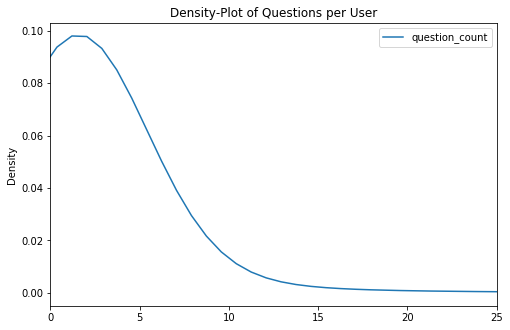

In [139]:
plot = user_question[['question_count']].plot.kde(title='Density-Plot of Questions per User', 
                                                  figsize=(8, 5.2), 
                                                  xlim = (0, 25), 
                                                  bw_method = 0.8)

### Questions Score Distribution

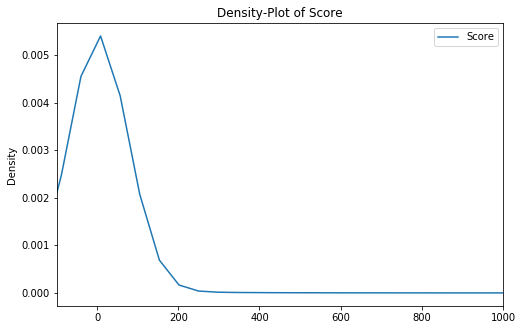

In [140]:
# density plot for Score
dens_plot = questions[['Score']].plot.density(title='Density-Plot of Score', 
                                              figsize=(8, 5.2), 
                                              xlim = (-100, 1000), 
                                              bw_method = 1)

### Questions View Count Distribution

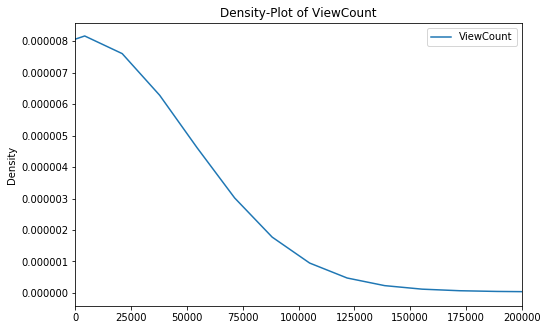

In [141]:
# density plot for ViewCount
dens_plot = questions[['ViewCount']].plot.density(title='Density-Plot of ViewCount', 
                                                  figsize=(8, 5.2), 
                                                  xlim = (1, 200000),
                                                  bw_method = 1)

### Questions Answer Count Distribution

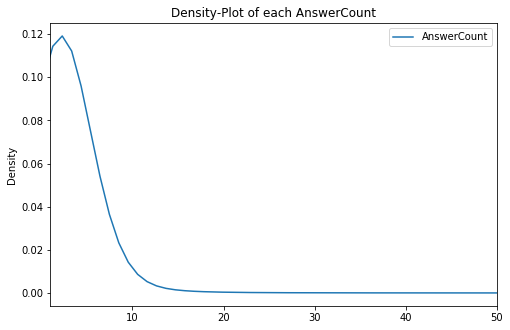

In [142]:
# density plot for AnswerCount
dens_plot = questions[['AnswerCount']].plot.density(title='Density-Plot of each AnswerCount', 
                                                    figsize=(8, 5.2), 
                                                    xlim = (1, 50), 
                                                    bw_method = 1)

### Questions Comment Count Distribution

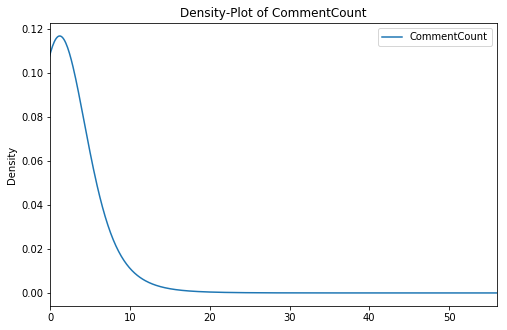

In [143]:
# density plot for CommentCount
dens_plot = questions[['CommentCount']].plot.density(title='Density-Plot of CommentCount', 
                                                     figsize=(8, 5.2), 
                                                     xlim = (0, 56), 
                                                     bw_method = 1)

### Questions Favourite Count Distribution

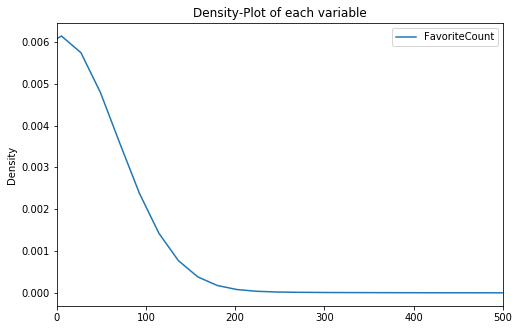

In [144]:
# density plot for FavoriteCount
dens_plot = questions[['FavoriteCount']].plot.density(title='Density-Plot of each variable', 
                                                      figsize=(8, 5.2), 
                                                      xlim = (0, 500), 
                                                      bw_method = 1)

## Answers Exploration

In [156]:
answers = pd.read_csv('data/Answers.csv', 
                      low_memory=False).drop(['Unnamed: 0'], 1)

#### Type of data

In [145]:
answers.dtypes

Id                         int64
PostTypeId                 int64
AcceptedAnswerId         float64
ParentId                 float64
CreationDate              object
DeletionDate             float64
Score                      int64
ViewCount                float64
Body                      object
OwnerUserId                int64
OwnerDisplayName          object
LastEditorUserId         float64
LastEditorDisplayName     object
LastEditDate              object
LastActivityDate          object
Title                     object
Tags                      object
AnswerCount              float64
CommentCount               int64
FavoriteCount            float64
ClosedDate                object
CommunityOwnedDate        object
dtype: object

#### Size of each Sample

In [147]:
answers.head(1).transpose()

,0
Id,8825740
PostTypeId,2
AcceptedAnswerId,NaN
ParentId,2.38153e+06
CreationDate,2012-01-11 19:53:57
DeletionDate,NaN
Score,14
ViewCount,NaN
Body,<p>It is possible to do everything you want. A...
OwnerUserId,1144035


#### Number of samples in dataset

In [148]:
i = answers.shape
print('There are', i[0], 'answers with', i[1], 'features.')

There are 930668 answers with 22 features.


In [149]:
answers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,930668.0,2.118422e+07,1.714353e+07,1141.0,5757926.25,16930827.0,34224430.25,60245884.0
PostTypeId,930668.0,1.997192e+00,1.288017e-01,1.0,2.00,2.0,2.00,6.0
AcceptedAnswerId,5130.0,1.307581e+07,1.550224e+07,4449.0,1936562.75,5283550.0,21194412.75,60244434.0
ParentId,923124.0,2.114552e+07,1.710958e+07,4.0,5758321.50,16915848.0,34127949.25,60245789.0
DeletionDate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Score,930668.0,6.537395e+00,7.674702e+01,-51.0,1.00,2.0,4.00,31409.0
ViewCount,6146.0,1.598089e+04,1.339871e+05,10.0,396.25,1330.5,5137.75,7996617.0
OwnerUserId,930668.0,4.776141e+05,8.383701e+05,267.0,23354.00,118068.0,548225.00,3832970.0
LastEditorUserId,327056.0,6.456028e+05,1.151393e+06,-1.0,20860.00,157247.0,641914.00,12809784.0
AnswerCount,6146.0,3.207615e+00,6.428819e+00,0.0,1.00,2.0,4.00,407.0


### Answers Per User

In [150]:
user_answer = answers.groupby(['OwnerUserId']).size().reset_index(name='answer_count')

user_answer.describe()

,OwnerUserId,answer_count
count,1.080000e+02,108.000000
mean,3.211547e+05,8617.296296
std,6.297311e+05,7481.176941
min,2.670000e+02,186.000000
25%,2.230050e+04,3833.000000
50%,1.052865e+05,6447.500000
75%,2.807802e+05,11221.500000
max,3.832970e+06,50000.000000


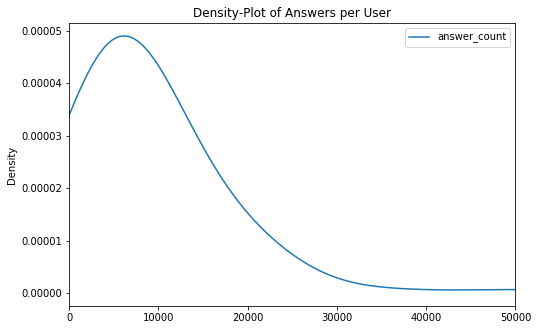

In [151]:
plot = user_answer[['answer_count']].plot.kde(title="Density-Plot of Answers per User", 
                                              figsize=(8, 5.2), 
                                              xlim = (0, 50000), 
                                              bw_method = 0.8)

### Answers Score Distribution

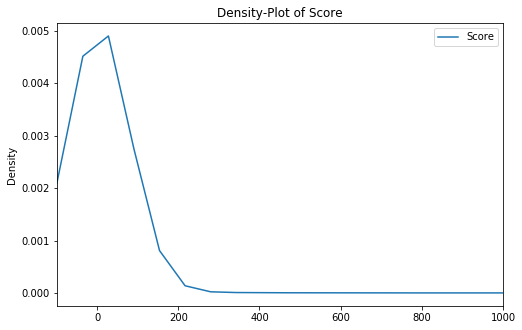

In [152]:
# density plot for Score
dens_plot = answers[['Score']].plot.density(title='Density-Plot of Score', 
                                            figsize=(8, 5.2), 
                                            xlim = (-100, 1000), 
                                            bw_method = 1)

### Answers Comment Count Distribution

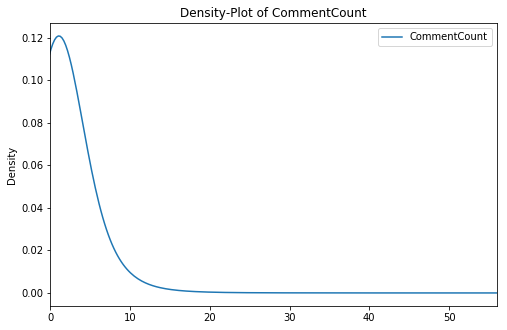

In [153]:
# density plot for CommentCount
dens_plot = answers[['CommentCount']].plot.density(title='Density-Plot of CommentCount', 
                                                   figsize=(8, 5.2),
                                                   xlim = (0, 56), 
                                                   bw_method = 1)

## Users Exploration

In [ ]:
users = pd.read_csv('data/Users.csv')

#### Type of data

In [157]:
users.dtypes

Id                   int64
Reputation           int64
CreationDate        object
DisplayName         object
LastAccessDate      object
WebsiteUrl          object
Location            object
AboutMe             object
Views                int64
UpVotes              int64
DownVotes            int64
ProfileImageUrl     object
EmailHash          float64
AccountId            int64
dtype: object

#### Size of each Sample

In [158]:
users.head(1).transpose()

,0
Id,9021
Reputation,464987
CreationDate,2008-09-15 17:31:26
DisplayName,nickf
LastAccessDate,2019-12-16 22:41:23
WebsiteUrl,http://spadgos.github.io/
Location,"Zürich, Switzerland"
AboutMe,<p>Javascript nerd. Senior Software Engineer a...
Views,16993
UpVotes,2593


#### Number of samples in dataset

In [161]:
i = users.shape
print('There are', i[0], 'users with', i[1], 'features.')

There are 108 users with 14 features.


In [162]:
users.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,108.0,321154.712963,629731.073190,267.0,22300.50,105286.5,280780.25,3832970.0
Reputation,108.0,491845.148148,171224.797635,323699.0,366319.50,433458.5,579305.00,1163680.0
Views,108.0,93265.824074,192077.494966,9096.0,33791.75,50124.0,86302.75,1905220.0
UpVotes,108.0,9040.462963,8430.048718,2.0,3366.75,6630.0,12451.75,52943.0
DownVotes,108.0,5337.314815,11321.339032,0.0,278.75,1057.0,4094.00,69355.0
EmailHash,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,108.0,269277.370370,753982.206048,213.0,11534.50,36873.5,112759.75,4739783.0


### Users Reputation Distribution

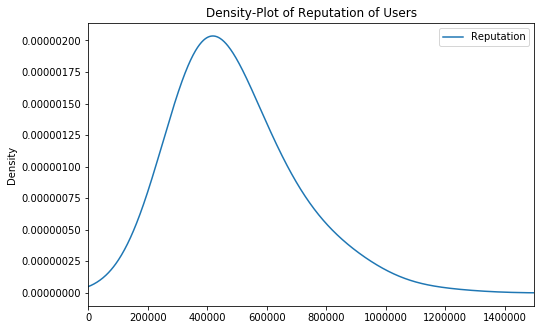

In [163]:
plot = users[['Reputation']].plot.kde(title="Density-Plot of Reputation of Users", 
                                              figsize=(8, 5.2), 
                                              xlim = (0, 1500000), 
                                              bw_method = 0.8)

### Users View Count Distribution

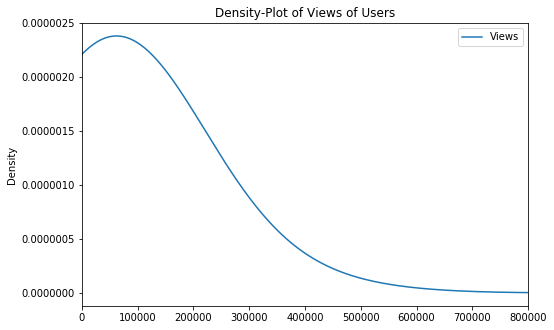

In [164]:
plot = users[['Views']].plot.kde(title="Density-Plot of Views of Users", 
                                 figsize=(8, 5.2), 
                                 xlim = (0, 800000), 
                                 bw_method = 0.8)

### Users Upvotes Distribution

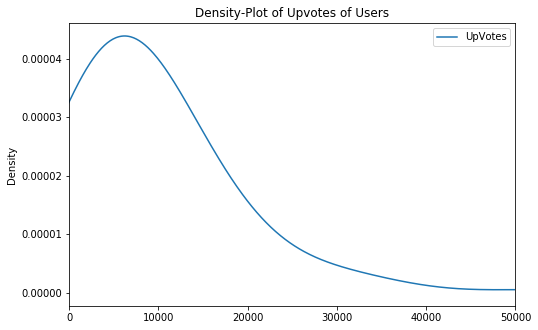

In [165]:
plot = users[['UpVotes']].plot.kde(title="Density-Plot of Upvotes of Users", 
                                   figsize=(8, 5.2), 
                                   xlim = (0, 50000), 
                                   bw_method = 0.8)

### Users Downvotes Distribution

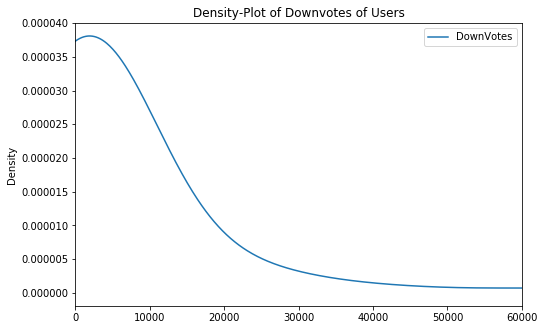

In [166]:
plot = users[['DownVotes']].plot.kde(title="Density-Plot of Downvotes of Users", 
                                     figsize=(8, 5.2), 
                                     xlim = (0, 60000), 
                                     bw_method = 0.8)

## Badges Exploration

In [167]:
badges = pd.read_csv('data/Badges.csv').drop(['Unnamed: 0'], 1)

In [168]:
badges

,Id,UserId,Name,Date,Class,TagBased
0,18343493,22656,Good Answer,2016-04-19 13:46:29,2,False
1,20650151,22656,Nice Answer,2016-10-18 12:25:41,3,False
2,20650211,6309,Nice Answer,2016-10-18 12:30:45,3,False
3,20650808,22656,Enlightened,2016-10-18 13:14:18,2,False
4,20652124,22656,Good Answer,2016-10-18 14:43:19,2,False
...,...,...,...,...,...,...
219720,29286882,17034,Good Answer,2018-08-22 06:50:26,2,False
219721,29288330,19068,Great Answer,2018-08-22 09:10:28,1,False
219722,29288723,157882,Nice Answer,2018-08-22 09:45:18,3,False
219723,29290738,157247,Good Answer,2018-08-22 12:25:08,2,False


#### Type of data

In [169]:
badges.dtypes

Id           int64
UserId       int64
Name        object
Date        object
Class        int64
TagBased      bool
dtype: object

#### Size of each Sample

In [172]:
badges.head(1).transpose()

,0
Id,18343493
UserId,22656
Name,Good Answer
Date,2016-04-19 13:46:29
Class,2
TagBased,False


#### Number of samples in dataset

In [173]:
i = badges.shape
print('There are', i[0], 'badges with', i[1], 'features.')

There are 219725 badges with 6 features.


### Users Badges Distribution

In [174]:
user_badges = badges[badges['TagBased'] == False]
user_badges = user_badges.groupby(['Name']).size().reset_index(name='type_count')
user_badges = user_badges.sort_values(['type_count'], ascending=False).reset_index()

user_badges

,index,Name,type_count
0,51,Nice Answer,85403
1,27,Enlightened,40163
2,36,Good Answer,30321
3,40,Guru,13982
4,38,Great Answer,6598
...,...,...,...
86,66,Research Assistant,10
87,6,Beta,8
88,72,Sheriff,7
89,22,Documentation Beta,4


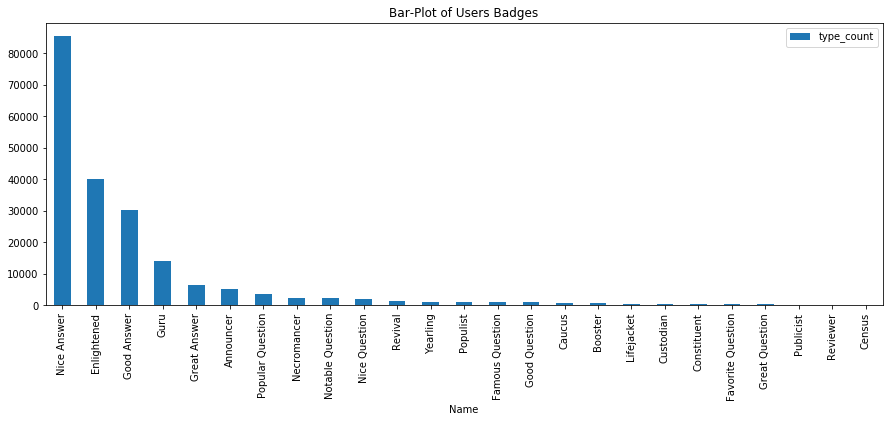

In [175]:
plot = user_badges.head(25).plot.bar(title='Bar-Plot of Users Badges', 
                                     figsize=(15, 5.2), 
                                     x='Name', 
                                     y='type_count', 
                                     rot=90)

## Analysis

Perform some statistical analysis of the dataset to quantify it’s distribution. 
> As we can see in the plots above, most of our distributions follow *Power law distribution* because they are related to human behaviour. But users' reputation, questions score, and answer score seem to follow *Beta distribution*.

## Potential Problems

Note any potential problems with the dataset

> The Stack Overflow has millions of active users that create content on this platform. As a result, the datasets are enormous, and it is impossible to store them on PC RAMs. The first problem is how to deal with these datasets? The only solution is using Database to store them on HDDs, but these datasets are more massive than our HDDs. Consequently, we must use cloud base Database platforms like [Google Big Query](https://cloud.google.com/bigquery) and [Stack Exchange Data Explorer](https://data.stackexchange.com/stackoverflow/query/new). We choose SEDE because it is free. This platform enables us to retrieve a small chunk of datasets using SQL queries. We prune the data first by users who have the most contribution to this platform. After pruning the users, we try to find these users' activities and information. We solved this problem for now, but we eliminate lots of data that may lead to a decrease in the significance of our results or maybe affect the reliability of our results. If we can not manage to find a suitable model, we'll have to add more data from other types of users and retrain our model. However, these users have the best data quality among all of the users, so we hope that we can model real and unseen users and questions based on these selected users with the least possible error.

## Related dataset

List any related public datasets that are similar to the one you will use. 

> Our dataset is publicly available [here](https://archive.org/details/stackexchange) which is in XML format. Another available dataset is [SOTorrent](https://empirical-software.engineering/projects/sotorrent/), but both are gigantic, and require to set up a database to work with this data.

#### Note

Amirabbas Jalali and Mina Mousavifar have both contributed in this phase of the project, because we will use the same dataset for the same problem with different approaches.